--- 
title: PA 9.1
author: Isabelle Antaran
format:
    html:
        toc: true
        code-fold: true
        embed-resources: true
theme: flatly
---

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [52]:
import numpy as np
import pandas as pd
import plotnine as p9


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
ha = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

In [4]:
ha.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [49]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               204 non-null    object
 1   age                204 non-null    int64 
 2   sex                204 non-null    int64 
 3   cp                 204 non-null    int64 
 4   trtbps             204 non-null    int64 
 5   chol               204 non-null    int64 
 6   restecg            204 non-null    int64 
 7   thalach            204 non-null    int64 
 8   diagnosis          204 non-null    object
 9   diagnosis_numeric  204 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.1+ KB


In [6]:
ha.isnull().sum()

Name         0
age          0
sex          0
cp           0
trtbps       0
chol         0
restecg      0
thalach      0
diagnosis    0
dtype: int64

In [7]:
ha['diagnosis_numeric'] = ha['diagnosis'].map({'No Disease': 0, 'Disease': 1})

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [8]:
X = ha[['age', 'chol']]
y = ha['diagnosis_numeric']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [15]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5365853658536586
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.41      0.42        17
           1       0.60      0.62      0.61        24

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.52        41
weighted avg       0.53      0.54      0.53        41

Confusion Matrix:
[[ 7 10]
 [ 9 15]]


In [16]:
intercept_log = model.intercept_[0]
coefs_log = model.coef_[0]

age = 55 #age fixed at 55


In [17]:
print(intercept_log)
print(coefs_log)

3.3352343331261305
[-0.04477063 -0.00283207]


Question 1: Cholesterol level for 50% probability

In [25]:
chol_log_50 = (-intercept_log - (coefs_log[0] * age)) / coefs_log[1]

print(f"Logistic Regression:")
print(f"For a 55-year-old to be on the decision boundary, the cholesterol would need to be about {chol_log_50}")

Logistic Regression:
For a 55-year-old to be on the decision boundary, the cholesterol would need to be about 308.2018987238324


Question 2: Cholesterol level for 90% probability

In [28]:
chol_log_90 = (np.log(9) - intercept_log - (coefs_log[0] * age)) / coefs_log[1]

print(f"For a 90% chance of heart disease, the cholesterol would need to be about {chol_log_90}\n")

For a 90% chance of heart disease, the cholesterol would need to be about -467.6345322496072



## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [29]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
y_pred = lda_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5365853658536586
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.41      0.42        17
           1       0.60      0.62      0.61        24

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.52        41
weighted avg       0.53      0.54      0.53        41

Confusion Matrix:
[[ 7 10]
 [ 9 15]]


In [32]:
intercept_lda = lda_model.intercept_[0]
coefs_lda = lda_model.coef_[0]

print(intercept_lda)
print(coefs_lda)

3.2972170612859197
[-0.04440064 -0.00275855]


Question: Cholesterol level for the decision boundary

In [34]:
chol_lda = (-intercept_lda - (coefs_lda[0] * age)) / coefs_lda[1]

print(f"Linear Discriminant Analysis:")
print(f"For a 55-year-old to be on the decision boundary, the cholesterol would need to be about {chol_lda}\n")
     

Linear Discriminant Analysis:
For a 55-year-old to be on the decision boundary, the cholesterol would need to be about 310.0118409369912



## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [51]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svc_base = SVC(kernel='linear')
grid_search = GridSearchCV(svc_base, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

svc_model = grid_search.best_estimator_
print(f"Best C parameter: {grid_search.best_params_['C']}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

Best C parameter: 0.01
Best CV score: 0.6193


In [36]:
y_pred = svc_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51        17
           1       0.65      0.62      0.64        24

    accuracy                           0.59        41
   macro avg       0.58      0.58      0.58        41
weighted avg       0.59      0.59      0.59        41

Confusion Matrix:
[[ 9  8]
 [ 9 15]]


In [37]:
coef_svc = svc_model.coef_[0]
intercept_svc = svc_model.intercept_[0]
print(coef_svc)
print(intercept_svc)

[-0.07168393 -0.00428878]
5.172100697702974


Question: Cholesterol level for the decision boundary

In [39]:
chol_svc = (-intercept_svc - (coef_svc[0] * age)) / coef_svc[1]
print(f"Support Vector Classifier:")
print(f"For a 55-year-old to be on the decision boundary, the cholesterol would need to be about {chol_svc}\n")
     

Support Vector Classifier:
For a 55-year-old to be on the decision boundary, the cholesterol would need to be about 286.6745230456195



## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [41]:
x_min, x_max = X['age'].min(), X['age'].max()
ages_for_plot = np.linspace(x_min, x_max, 300)

chol_log_line = (-intercept_log - coefs_log[0] * ages_for_plot) / coefs_log[1]
chol_lda_line = (-intercept_lda - coefs_lda[0] * ages_for_plot) / coefs_lda[1]
chol_svc_line = (-intercept_svc - coef_svc[0] * ages_for_plot) / coef_svc[1]

print(chol_log_line)
print(chol_lda_line)
print(chol_svc_line)

[719.22121081 716.68340183 714.14559286 711.60778388 709.06997491 706.53216593
 703.99435695 701.45654798 698.918739   696.38093003 693.84312105 691.30531207
 688.7675031  686.22969412 683.69188514 681.15407617 678.61626719 676.07845822
 673.54064924 671.00284026 668.46503129 665.92722231 663.38941334 660.85160436
 658.31379538 655.77598641 653.23817743 650.70036846 648.16255948 645.6247505
 643.08694153 640.54913255 638.01132358 635.4735146  632.93570562 630.39789665
 627.86008767 625.32227869 622.78446972 620.24666074 617.70885177 615.17104279
 612.63323381 610.09542484 607.55761586 605.01980689 602.48199791 599.94418893
 597.40637996 594.86857098 592.33076201 589.79295303 587.25514405 584.71733508
 582.1795261  579.64171713 577.10390815 574.56609917 572.0282902  569.49048122
 566.95267224 564.41486327 561.87705429 559.33924532 556.80143634 554.26362736
 551.72581839 549.18800941 546.65020044 544.11239146 541.57458248 539.03677351
 536.49896453 533.96115556 531.42334658 528.8855376  

In [44]:
df_boundaries = pd.DataFrame({
    'age': np.concatenate([ages_for_plot, ages_for_plot, ages_for_plot]),
    'chol': np.concatenate([chol_log_line, chol_lda_line, chol_svc_line]),
    'Model': ['Logistic Regression'] * 300 + ['LDA'] * 300 + ['SVC'] * 300
})

ha_plot = ha.dropna(subset=['diagnosis', 'diagnosis_numeric'])


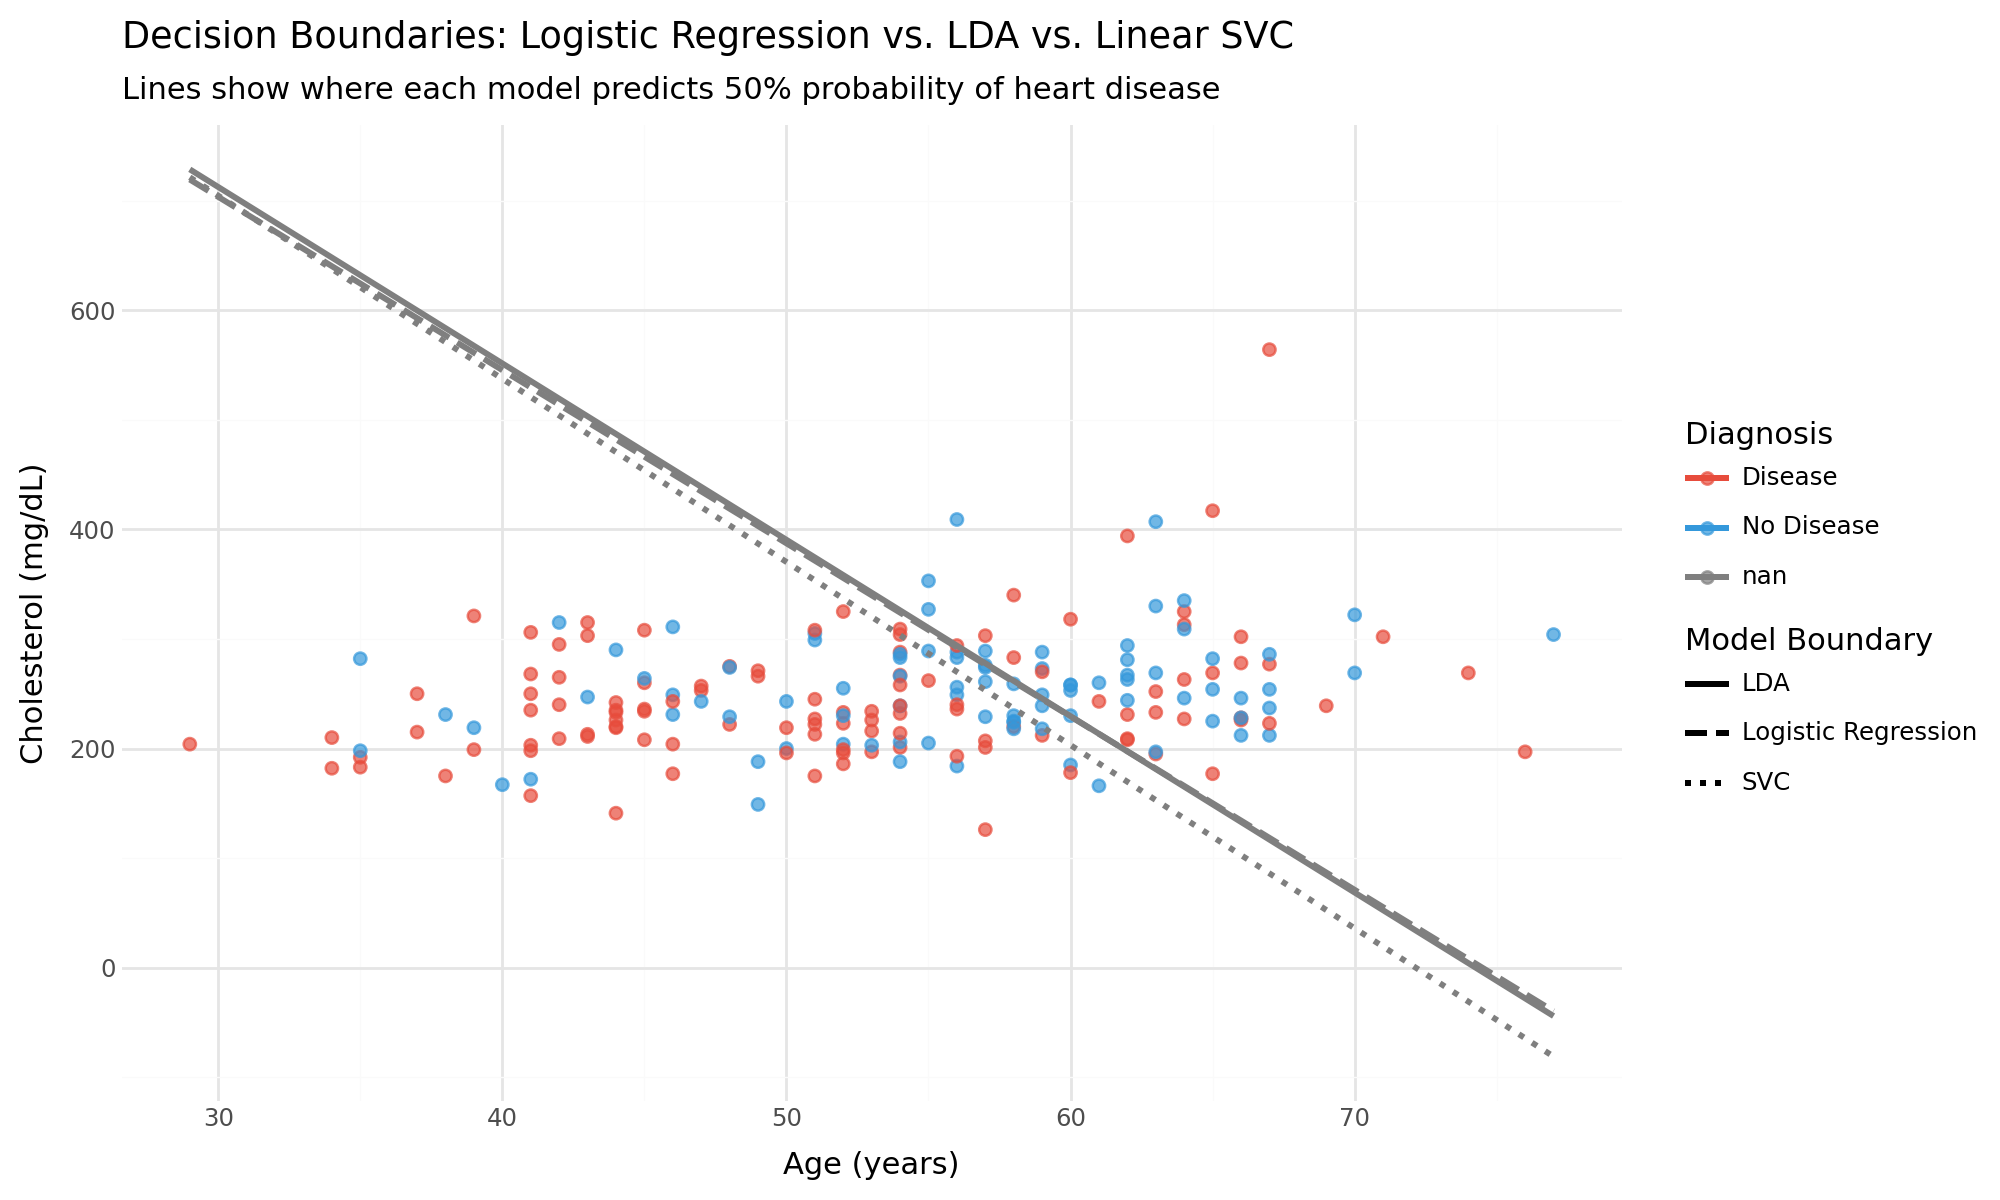

In [53]:
plot1 = (
    p9.ggplot(ha_plot, p9.aes(x='age', y='chol', color='diagnosis'))
    + p9.geom_point(alpha=0.7, size=2)
    + p9.geom_line(
        data=df_boundaries,
        mapping=p9.aes(x='age', y='chol', linetype='Model', color=None),
        size=1.2
    )
    + p9.scale_color_manual(values={'No Disease': "#3498db", 'Disease': "#e74c3c"}, name="Diagnosis")
    + p9.scale_linetype_manual(values=["solid", "dashed", "dotted"], name="Model Boundary")
    + p9.labs(
        title="Decision Boundaries: Logistic Regression vs. LDA vs. Linear SVC",
        subtitle="Lines show where each model predicts 50% probability of heart disease",
        x="Age (years)",
        y="Cholesterol (mg/dL)"
    )
    + p9.theme_minimal()
    + p9.theme(figure_size=(10, 6))  
)
plot1.show()